In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
df = pd.read_csv('C:\\Users\\aahsa\\Downloads\\clean_Recipes.csv')

In [5]:
df.head()

,Name,PrepTime,TotalTime,Description,Images,RecipeCategory,Keywords,RecipeInstructions,CombinedIngredients,AggregatedRating,ReviewCount,Calories,RecipeServings,nutrition,AuthorName
0,Low-Fat Berry Blue Frozen Dessert,45 mins,24 hour 45 mins,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""Toss 2 cups berries with sugar."", ""Let stan...","c(""4"", ""1/4"", ""1"", ""1"") c(""blueberries"", ""gran...",4.5,4.0,170.9,4.0,"Saturated_Fat: 1.3, Cholestrol: 8.0, Sodium: 2...",Dancer
1,Biryani,4 hour,4 hour 25 mins,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""Soak saffron in warm milk for 5 minutes and...","c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ...",3.0,1.0,1110.7,6.0,"Saturated_Fat: 16.6, Cholestrol: 372.8, Sodium...",elly9812
2,Best Lemonade,30 mins,35 mins,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","c(""Into a 1 quart Jar with tight fitting lid, ...","c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"") c(""sug...",4.5,10.0,311.1,4.0,"Saturated_Fat: 0.0, Cholestrol: 0.0, Sodium: 1...",Stephen Little
3,Carina's Tofu-Vegetable Kebabs,24 hour,24 hour 20 mins,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...","c(""Drain the tofu, carefully squeezing out exc...","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...",4.5,2.0,536.1,2.0,"Saturated_Fat: 3.8, Cholestrol: 0.0, Sodium: 1...",Cyclopz
4,Cabbage Soup,20 mins,50 mins,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","c(""Mix everything together and bring to a boil...","c(""46"", ""4"", ""1"", ""2"", ""1"") c(""plain tomato ju...",4.5,11.0,103.6,4.0,"Saturated_Fat: 0.1, Cholestrol: 0.0, Sodium: 9...",Duckie067


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511582 entries, 0 to 511581
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Name                 511582 non-null  object 
 1   PrepTime             511582 non-null  object 
 2   TotalTime            511582 non-null  object 
 3   Description          511582 non-null  object 
 4   Images               511582 non-null  object 
 5   RecipeCategory       511582 non-null  object 
 6   Keywords             511582 non-null  object 
 7   RecipeInstructions   511582 non-null  object 
 8   CombinedIngredients  511582 non-null  object 
 9   AggregatedRating     511582 non-null  float64
 10  ReviewCount          511582 non-null  float64
 11  Calories             511582 non-null  float64
 12  RecipeServings       511582 non-null  float64
 13  nutrition            511582 non-null  object 
 14  AuthorName           511582 non-null  object 
dtypes: float64(4), ob

In [5]:
df.describe()

,AggregatedRating,ReviewCount,Calories,RecipeServings
count,511582.000000,511582.000000,511582.000000,511582.000000
mean,2.874762,3.224564,492.240636,4.728057
std,1.872629,14.836503,1410.717715,4.736016
min,1.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,180.900000,1.000000
50%,3.000000,1.000000,323.500000,4.000000
75%,5.000000,2.000000,535.500000,6.000000
max,5.000000,3063.000000,612854.600000,25.000000


In [6]:
print(df.isnull().sum())

Name                   0
PrepTime               0
TotalTime              0
Description            0
Images                 0
RecipeCategory         0
Keywords               0
RecipeInstructions     0
CombinedIngredients    0
AggregatedRating       0
ReviewCount            0
Calories               0
RecipeServings         0
nutrition              0
AuthorName             0
dtype: int64


<Axes: >

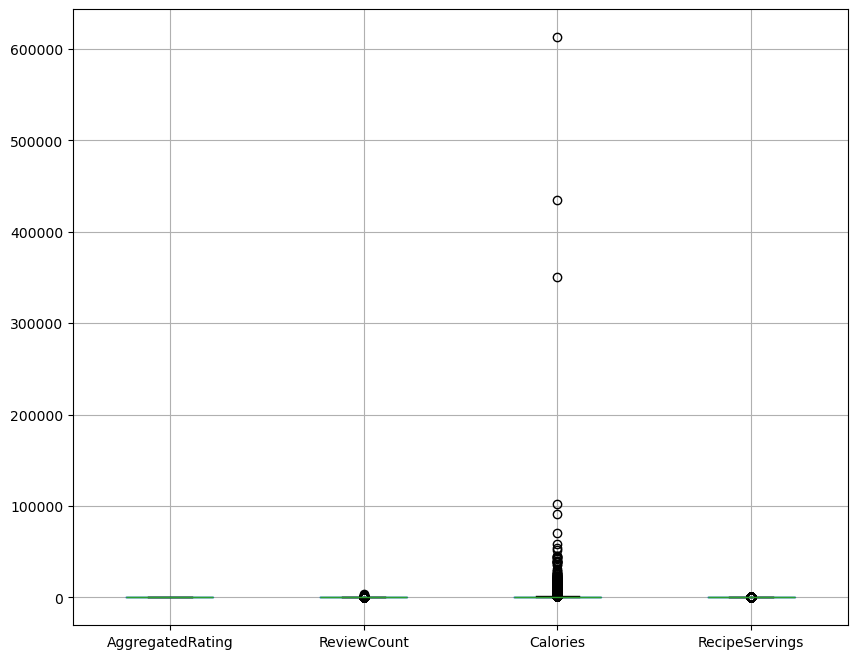

In [7]:
df.boxplot(figsize=(10, 8))

In [8]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) 
Q1 = df['Calories'].quantile(0.25) 
Q3 = df['Calories'].quantile(0.75) 
IQR = Q3 - Q1 
# Define the lower and upper bounds for outliers 
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR
# Filter out the outliers 
df = df[(df['Calories'] >= lower_bound) & (df['Calories'] <= upper_bound)]
print(df)

                                            Name  PrepTime        TotalTime  \
0              Low-Fat Berry Blue Frozen Dessert   45 mins  24 hour 45 mins   
2                                  Best Lemonade   30 mins          35 mins   
3                 Carina's Tofu-Vegetable Kebabs  24 hour   24 hour 20 mins   
4                                   Cabbage Soup   20 mins          50 mins   
5                           Best Blackbottom Pie   20 mins   2 hour 20 mins   
...                                          ...       ...              ...   
511574             Spanish Coffee with Tia Maria   10 mins          10 mins   
511575           Slow-Cooker Classic Coffee Cake   20 mins   3 hour 20 mins   
511576                 Meg's Pumpkin Spice Bread   30 mins   1 hour 15 mins   
511577            Meg's Fresh Ginger Gingerbread   1 hour    1 hour 35 mins   
511580  Quick & Easy Asian Cucumber Salmon Rolls   15 mins          15 mins   

                                              Descr

In [9]:
df.boxplot(figsize=(10, 8))

<Axes: >

In [10]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) 
Q1 = df['ReviewCount'].quantile(0.25) 
Q3 = df['ReviewCount'].quantile(0.75) 
IQR = Q3 - Q1 
# Define the lower and upper bounds for outliers 
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR
# Filter out the outliers 
df = df[(df['ReviewCount'] >= lower_bound) & (df['ReviewCount'] <= upper_bound)]
print(df)

                                              Name  PrepTime        TotalTime  \
3                   Carina's Tofu-Vegetable Kebabs  24 hour   24 hour 20 mins   
5                             Best Blackbottom Pie   20 mins   2 hour 20 mins   
7       Buttermilk Pie With Gingersnap Crumb Crust   30 mins   1 hour 20 mins   
8                          A Jad - Cucumber Pickle   25 mins          25 mins   
9                             Butter Pecan Cookies   55 mins    1 hour 4 mins   
...                                            ...       ...              ...   
511574               Spanish Coffee with Tia Maria   10 mins          10 mins   
511575             Slow-Cooker Classic Coffee Cake   20 mins   3 hour 20 mins   
511576                   Meg's Pumpkin Spice Bread   30 mins   1 hour 15 mins   
511577              Meg's Fresh Ginger Gingerbread   1 hour    1 hour 35 mins   
511580    Quick & Easy Asian Cucumber Salmon Rolls   15 mins          15 mins   

                           

In [11]:
df.boxplot(figsize=(10, 8))

<Axes: >

In [12]:
df.hist(figsize=(10, 8))

array([[<Axes: title={'center': 'AggregatedRating'}>,
        <Axes: title={'center': 'ReviewCount'}>],
       [<Axes: title={'center': 'Calories'}>,
        <Axes: title={'center': 'RecipeServings'}>]], dtype=object)

In [13]:
print(df['ReviewCount'].value_counts())

ReviewCount
1.0    322195
2.0     48602
3.0     27426
Name: count, dtype: int64


In [14]:
print(df['AggregatedRating'].value_counts())

AggregatedRating
1.0    231003
5.0    103138
4.0     35131
4.5     15706
3.0      8083
3.5      2765
2.0      1810
2.5       527
1.5        60
Name: count, dtype: int64


In [10]:
df.to_csv('cleaned_recipes.csv', index=False)